# **FrozenLake 4**

# UWAGA

Wczytaj do Colab plik **frozen_lake_slippery.py** lub **frozen_lake.py** (intrukcja w pliku **COLAB_instrukcja.pdf**).

Wczytaj też plik **plot_utils.py**.

In [0]:
from frozen_lake import FrozenLakeEnv
#from frozen_lake_slippery import FrozenLakeEnv
import numpy as np
from plot_utils import plot_values

env = FrozenLakeEnv()

# Objaśnienie algorytmu

Algorytm wygląda następująco:

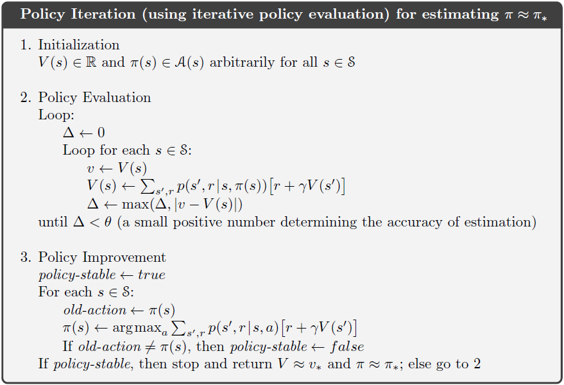

W algorymie można wyróżnić dwa główne bloki.

**Blok 1**

Algorytm wylicza **wartość zwrotów** ***V(s)*** dla wszystkich stanów ***s*** przy zadanej **polityce deterministycznej** oznaczonej ***pi*** (wyliczenie ***V*** odbywa się w **punkcie 2** algorytmu). 

**Blok 2**

Algorytm znajduje **politykę deteministyczną** ***pi*** na podstawie wyliczonych wcześniej wartości ***V(s)***(**punkt 3** algorytmu). Warto zwrócić uwagę, że zarówno ***V(s)*** jak i polityka ***pi*** są początkowo dowolne (***punkt 1*** algorytmu).


To co ciekawe odbywa się w nastepującej **pętli**:

Algorytm wylicza ***V(s)*** dla zadanej **polityki deterministycznej**  ***pi***, a następnie wyliczone wartości ***V(s)*** wykorzystuje **do modyfikacji polityki** ***pi***. Zmodyfikowana polityka służy do ponownego wyliczenia ***V(s)*** itd. 

W efekcie takich wzajemnych modyfikacji ***V*** i ***pi*** znaleziona zostaje **polityka optymalna** (najlepsza - gwarantująca najlepsze zwroty) dla danego problemu.... ***MAGIA*** :)

Warto zwrócić uwagę na **punkt 3** w algorytmie:

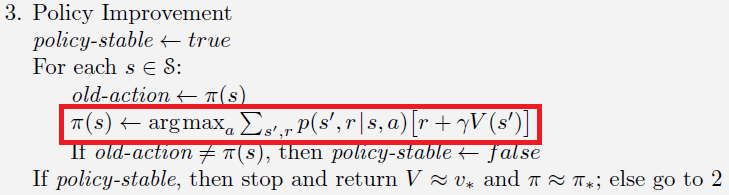

W formule w ramce użyta jest funkcja **argmax**. Jej definicja jest następująca:

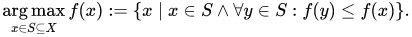

***argmax f(x)*** zwraca wartość argumentu ***x*** dla którego funkcja ***f*** osiąga **wartość maksymalną**. 

Linika oznaczona powyżej **czerwoną** ramką oznacza, że **nowa polityka** ***pi*** przypisuje stanowi ***s*** akcję, która (dla **aktualnych wartości** ***V***) daje **największy zwrot**! Czyli stosowana jest tutaj **strategia zachłanna (greedy)**.

Petlę w algotymie możemy zobrazować następująco:

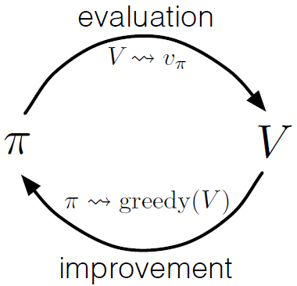

Wynikiem działania algorytmu jest **optymalna polityka** (deterministyczna) **pi*** i **V*** dla tej polityki.

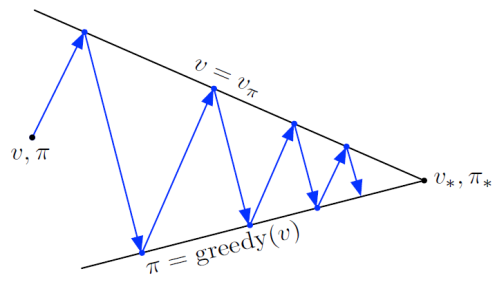

# Polityka deterministyczna

W implemntacji algorytmu będziemy stosowali **politykę deteministyczną**. Jest to polityka, która każdemu stanowi ***s*** przypisuje akcję ***a***, która ma być wykonana w tym stanie. Możemy ją zdefiniować następująco (***env.nS*** to liczba stanów w środowisku ***env***):

In [0]:
pi = np.random.randint(0, env.nA, size=env.nS)

print(pi)

Polityka ta dla każdego stanu **s** określa akcję.

Przykład: akcja wykonana w stanie 4 (stany numerowane są od 0 do 15):

In [0]:
pi[4]

# Wyliczenie V dla zadanej polityki

Zajmijmy się **punktem 2** algorytmu czyli wyliczeniem ***V(s)*** dla zadanej **polityki deterministycznej** ***pi***. Problemu tego **dla polityki stochastycznej** dotyczyło **zadanie 3** z **RL_lab_4.pdf**.

# Polecenie 1 (do uzupełnienia)

**Uzupełnij poniższą definicję** funkcji zwracającej ***V*** dla zadanej **polityki deterministycznej** ***policy***.

In [0]:
def det_policy_evaluation(env, policy, gamma=0.9, theta=1e-8):
    V = np.zeros(env.nS)
    
    while True:
        delta = .0
        for state in range(env.nS):
            Vs = 0
            for next_state in range(len(env.P[state][policy[state]])):
                    
                prob, next_state, reward, done = env.P[state][policy[state]][next_state]

                #DO UZUPEŁNIENIA
            
            delta = max(delta, np.abs(V[state] - Vs))
            V[state] = Vs
        if delta < theta:
            break
    
    return V     

UWAGA: warto zwrócić uwagę, gdzie w powyższym kodzie użyta jest polityka deterministyczna **policy**:

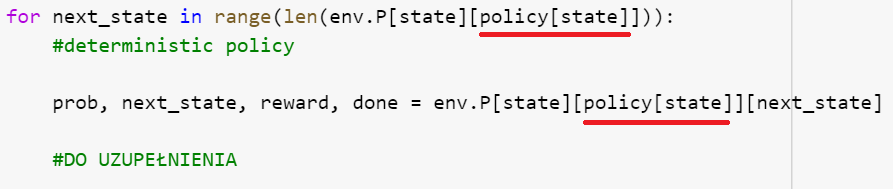

Testujemy działanie funkcji dla **polityki deterministycznej** ***pi***:

In [0]:
pi = np.array([1,0,0,0,1,0,0,0,2,2,1,0,0,0,2,0])
V = det_policy_evaluation(env,pi)
print(V)

**Wartości** ***V(s)*** można przedstawić graficznie korzystając z funkcji **plot_values()** z **biblioteki** **plot_utils**:

In [0]:
plot_values(V)

# Znalezienie polityki dla zadanego V metodą zachłanną

Zajmijmy się teraz **punktem 3** algorytmu czyli znalezieniem **polityki deterministycznej** ***pi*** dla danego ***V***. Interesuje nas następujący fragment kodu:

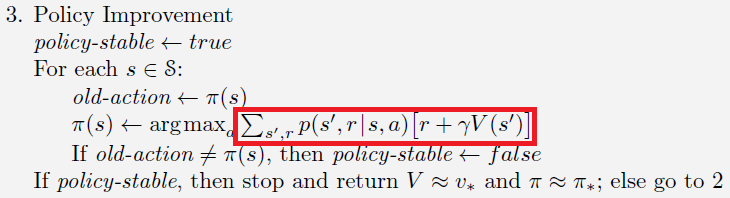

Warto zauważyć, że w powyższym kodzie nie tylko jest znajdowana nowa polityka, ale **także jest ona porównywana z dotychczasową**. I jeżeli obie są takie same, wówczas algorytm kończy działanie. W przeciwnym razie następuje powrót do **punktu 2**.

# Polecenie 2 (do uzupełnienia)

Znalezie polityki dla danego ***V*** można "zamknąć" w funkcji **det_policy_iteration**, która jako argumenty otrzyma ***env***, ***V*** i wartość ***gamma***, a zwróci nam wyliczoną politykę. Warto zwrócić uwagę na to, że **formuła oznaczona powyżej czerwoną ramką** była wykorzystywana w **Zadaniu 1 z części 5**. Czyli możemy wykorzystać funkcję już zdefiniowaną (w **FrozeLake_3.ipynb**). Uzupełnij jej definicję poniżej:

In [0]:
def Q_from_V(env, V, s, gamma=0.99):
    Q = np.zeros(env.nA)
        
        #DO UZUPEŁNIENIA
    
    return Q

Czas na funkcję **det_policy_iteration**:

In [0]:
def det_policy_iteration(env, V, gamma=0.99):
    policy = np.zeros([env.nS])

    for state in range(env.nS):
      
        #DO UZUPEŁNIENIA

    return policy

Przetestuj działanie funkcji **det_policy_iteration** dla poniższego ***V***:

In [0]:
V = np.array([0.1,0.5,0.8,0.2,0.2,0.,0.4,0.,0.3,0.5,0.8,0.,0.,0.1,1.,0.])
pi = det_policy_iteration(env,V)
print(pi)

# Implementacja algorytmu

W implementowanym algorytmie po znalezieniu nowej polityki następuje **porównanie** jej ze starą polityką:

image.png

**Polityki** są u nas zapisane **w tablicach**. Musimy mieć zatem **metodę porównującą dwie tablice** i zwracającą **True/False** jeżeli tablice polityk **są/nie są** identyczne.  

# Polecenie 3 (do uzupełnienia)

Uzupełnij poniższą funkcję pozwalającą porównywać dwie polityki (tablice) będące jej argumentami i zwracającą **True/False**:

In [0]:
def compPolicy(p1,p2):

    #DO UZUPEŁNIENIA


Przetestuj działanie funkcji dla dwóch przykładowych polityk:

In [0]:
pi_1 = np.array([3,2,0,3,0,3,3,0,1,3,3,0,0,3,0,0])
pi_2 = np.array([3,2,0,3,0,0,1,0,1,3,3,0,0,3,0,0])

print(compPolicy(pi_2,pi_1))

Mamy już wszystkie elementy wymagane do implementacji całego **algorytmu**.

# Polecenie 4 (do uzupełnienia)

Uzupełnij poniższą petlę tak, aby otrzymać **pełną implementację algorytmu**:

In [0]:
pi = np.array([1,0,0,0,1,0,0,0,2,2,1,0,0,0,2,0])
V = np.array([0.1,0.5,0.8,0.2,0.2,0.,0.4,0.,0.3,0.5,0.8,0.,0.,0.1,1.,0.])
    
while True:

        #DO UZUPEŁNIENIA


Po wykonaniu powyższego kodu w zmiennej ***pi*** będzie zapisana **optymalna polityka**. Wypiszmy ją:

In [0]:
print(pi)

# Polecenie 5 (do uzupełnienia)

Sprawdź czy **znaleziona polityka** jest optymalna. Odpowiedź uzasadnij.

TUTAJ WPISZ ODPOWIEDŹ:

Zobaczmy jak wyglądają **wartości oczekiwane zwrotów V** dla znalezionej polityki:

In [0]:
plot_values(V)

# Polecenie 6 (do uzupełnienia)

Sprawdź czy znaleziona powyżej **polityka optymalna** zmienia się jeżeli przyjmiemy dwie różne wartości parametru **gamma 0.1** i **0.99**.

TUTAJ WPISZ ODPOWIEDŹ: